# Quality Analysis (General)

#### Updated: May 19, 2023

#  

Quality analysis pipeline after phase 2 of Alouette processing (OCR processing phase):

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
rootDir = 'L:/DATA/Alouette_I/BATCH_II_Run2/'
resultDir = rootDir + '05_result/'
logDir = rootDir + '06_log/'

#  

#### Combine BATCH I and II:

#  

#### Stage 1 - Overall Statistics:

In [3]:
df_inventory = pd.read_csv(logDir + 'image_inventory.csv')
n_images = df_inventory['images'].sum()

In [4]:
df_s1 = pd.read_csv(resultDir + 'result_stage1_raw.csv', low_memory=False)

In [5]:
n_proc = len(df_s1.loc[df_s1['processed_image_class'] == 'num']) + len(df_s1.loc[df_s1['processed_image_class'] == 'dot'])
n_loss = len(df_s1.loc[df_s1['processed_image_class'] == 'loss'])
n_outlier = len(df_s1.loc[df_s1['processed_image_class'] == 'outlier'])
n_unproc = n_images - n_proc - n_outlier - n_loss

In [6]:
print('# of images: ' + str(n_images))
print('# of images processed after stage 1 processing: ' + str(n_proc))
print('% of images processed after stage 1 processing: ' + str(round(((n_proc/n_images)*100), 2)) + ' %')
print('')
print("% total loss after stage 1 processing: " + str(round((((n_unproc + n_loss + n_outlier)/n_images)*100), 2)) + ' %')
print('% of images unprocessed after stage 1 processing: ' + str(round(((n_unproc/n_images)*100), 2)) + ' %')
print("% of images classified as 'loss' after stage 1 processing: " + str(round(((n_loss/n_images)*100), 2)) + ' %')
print("% of images classified as 'outlier' after stage 1 processing: " + str(round(((n_outlier/n_images)*100), 2)) + ' %')

# of images: 726577
# of images processed after stage 1 processing: 449732
% of images processed after stage 1 processing: 61.9 %

% total loss after stage 1 processing: 38.1 %
% of images unprocessed after stage 1 processing: 17.34 %
% of images classified as 'loss' after stage 1 processing: 13.07 %
% of images classified as 'outlier' after stage 1 processing: 7.7 %


Breakdown 'loss' type:

In [7]:
df_loss_bd = df_s1.loc[df_s1['processed_image_class'] == 'loss'].groupby(['func_name']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
func_name,
metadata_translation.determine_leftside_metadata_grid_mapping.extract_centroids_and_determine_type,37872
ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth,9521
image_segmentation.trim_raw_metadata.trimming_metadata,3968
image_segmentation.extract_ionogram_from_scan.extract_ionogram,1


Breakdown 'outlier' type:

In [8]:
df_outlier_bd = df_s1.loc[df_s1['processed_image_class'] == 'outlier'].groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,54428
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,1511


#  

#### Stage 2 - Overall Statistics:

In [9]:
df_s2 = pd.read_csv(resultDir + 'result_stage2_raw.csv', low_memory=False)

In [10]:
n_num2 = len(df_s2.loc[df_s2['processed_image_class'] == 'num2'])
n_num = len(df_s2.loc[df_s2['processed_image_class'] == 'num'])
n_dot = len(df_s2.loc[df_s2['processed_image_class'] == 'dot'])
n_proc2 = n_num2 + n_num + n_dot
n_loss = len(df_s2.loc[df_s2['processed_image_class'] == 'loss'])
n_outlier = len(df_s2.loc[df_s2['processed_image_class'] == 'outlier'])

In [11]:
print('# of images processed after stage 2 processing: ' + str(n_proc2))
print('% of images processed after stage 2 processing: ' + str(round(((n_proc2/n_images)*100), 2)) + ' %')
print('')
print("% of images classified as 'num2' after stage 2 processing: " + str(round(((n_num2/n_images)*100), 2)) + ' %')
print("% of images classified as 'num' after stage 2 processing: " + str(round(((n_num/n_images)*100), 2)) + ' %')
print("% of images classified as 'dot' after stage 2 processing: " + str(round(((n_dot/n_images)*100), 2)) + ' %')
print('')
print("% total loss after stage 2 processing: " + str(round((((n_unproc + n_loss + n_outlier)/n_images)*100), 2)) + ' %')
print("% of images classified as 'loss' after stage 2 processing: " + str(round(((n_loss/n_images)*100), 2)) + ' %')
print("% of images classified as 'outlier' after stage 2 processing: " + str(round(((n_outlier/n_images)*100), 2)) + ' %')

# of images processed after stage 2 processing: 29280
% of images processed after stage 2 processing: 4.03 %

% of images classified as 'num2' after stage 2 processing: 1.51 %
% of images classified as 'num' after stage 2 processing: 2.31 %
% of images classified as 'dot' after stage 2 processing: 0.21 %

% total loss after stage 2 processing: 22.75 %
% of images classified as 'loss' after stage 2 processing: 4.38 %
% of images classified as 'outlier' after stage 2 processing: 1.03 %


Breakdown 'loss' type:

In [12]:
df_s2_loss = df_s2.copy(deep=True).loc[df_s2['processed_image_class'] == 'loss']
df_s2_loss['loss_summary'] = df_s2_loss['func_name'] + ', ' + df_s2_loss['details'] 
df_loss_bd = df_s2_loss.groupby(['loss_summary']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
loss_summary,
"image_segmentation.segment_images_in_subdir.segment_images: iono size outlier, OCR read metadata contains letters",178
"ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth, OCR read metadata contains letters",54
"image_segmentation.trim_raw_metadata.trimming_metadata, OCR read metadata contains letters",6
"metadata_translation.determine_leftside_metadata_grid_mapping.extract_centroids_and_determine_type, OCR read metadata contains letters",3
"image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier, OCR read metadata contains letters",1


In [13]:
df_s2_loss = df_s2.loc[df_s2['processed_image_class'] == 'loss']
df_loss_bd = df_s2_loss.groupby(['details']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
details,
metadata could not be read by OCR,15191
OCR read metadata contains letters,1753
metadata was interpreted to be num type,456
metadata was interpreted to be dot type,258


Breakdown 'outlier' type:

In [14]:
df_s2_outlier = df_s2.loc[df_s2['processed_image_class'] == 'outlier']
df_outlier_bd = df_s2_outlier.groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,7119
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,400


#  

#### Master - Overall Statistics:

In [15]:
df_master = pd.read_csv(resultDir + 'result_master.csv', low_memory=False)
n_master = len(df_master.loc[(~pd.isna(df_master['Station_Code'])) & (df_master['time_quality'] == 1)])

In [16]:
n_tq1 = len(df_master.loc[df_master['time_quality'] == 1])
n_tq2 = len(df_master.loc[df_master['time_quality'] == 2])
n_tq3 = len(df_master.loc[df_master['time_quality'] == 3])
n_tq4 = len(df_master.loc[df_master['time_quality'] == 4])

In [17]:
print('# of images fully read after stage 2 processing: ' + str(n_master))
print('% of images fully read after stage 2 processing (yield): ' + str(round(((n_master/n_images)*100), 2)) + ' %')
print('')
print('% time quality level 1 yield: ' + str(round(((n_tq1/n_images)*100), 2)) + ' %')
print('% at least time quality level 2: ' + str(round((((n_tq1+n_tq2)/n_images)*100), 2)) + ' %')
print('% at least time quality level 3: ' + str(round((((n_tq1+n_tq2+n_tq3)/n_images)*100), 2)) + ' %')
print('% at least time quality level 4: ' + str(round((((n_tq1+n_tq2+n_tq3+n_tq4)/n_images)*100), 2)) + ' %')

# of images fully read after stage 2 processing: 21340
% of images fully read after stage 2 processing (yield): 2.94 %

% time quality level 1 yield: 2.94 %
% at least time quality level 2: 2.95 %
% at least time quality level 3: 2.97 %
% at least time quality level 4: 3.13 %


#  

#### Data distribution by ground station:

In [18]:
df2 = df_master.copy(deep=True)
df2['Station_Number_Station_Code_processed_image_class'] = df2['Station_Number'].astype(int).astype(str) + '_' + df2['Station_Code'] + '_' + df2['processed_image_class']

In [19]:
df_master_by_stn = df2.groupby(['Station_Number']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stn.head(10)

,filename
Station_Number,
5.0,3751
13.0,2715
50.0,2060
1.0,1939
43.0,1662
69.0,1129
8.0,1126
3.0,950
15.0,764


In [20]:
df_master_by_stnname = df2.groupby(['Station_Name']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stnname.head(10)

,filename
Station_Name,
"Quito, Ecuador",4089
"College, Fairbanks, AK, USA",2696
"Ottawa, Canada",2079
"Resolute Bay, NT, Canada",1841
"Blossom Point, MD, USA",1769
"Tromso, Norway",1208
Falkland Islands (Islas Malvinas),1150
"Winkfield, England, UK",1078
"Santiago, Chile",998


In [24]:
df_master_by_stn_code = df2.groupby(['Station_Number_Station_Code_processed_image_class']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stn_code.head(20)

,filename
Station_Number_Station_Code_processed_image_class,
5_QUI_num,3725
13_COL_num,2449
50_OTT_num2,1964
1_BPT_num,1760
43_RES_num2,1653
69_TRO_num2,1128
3_FTM_num,787
15_WNK_num2,758
8_SNT_num,736


#  

#### Construct process_summary:

Load data:

In [25]:
print(len(df_inventory))
df_inventory.head()

2416


,Directory,Subdirectory,images,subdir_id
0,R014207709,145,53,R014207709_145
1,R014207709,146,63,R014207709_146
2,R014207709,147,50,R014207709_147
3,R014207709,148,16,R014207709_148
4,R014207709,149,28,R014207709_149


In [26]:
df_process_log = pd.read_csv(logDir + 'process_log.csv')
print(len(df_process_log))
df_p1 = df_process_log.sort_values('Process_timestamp', ascending=True)
df_p1 = df_p1.drop_duplicates(subset=['subdir_id'], keep='last') 
print(len(df_p1))
df_p1.head()

2417


,Directory,Subdirectory,Images_processed,Images_dot,Images_num,Images_loss,Images_outlier,Process_time,Process_timestamp,User,subdir_id
0,R014207837,4013-50,162.0,0.0,150.0,4.0,8.0,277.122729,2023-05-13 11:13:35.969795,Rav Super3,R014207837_4013-50
1,R014207769,JUNE-28-TO-JULY-6-1965,0.0,0.0,0.0,0.0,0.0,214.129275,2023-05-13 11:13:50.695690,Rav Super5,R014207769_JUNE-28-TO-JULY-6-1965
2,R014207820,2993-43A,16.0,0.0,12.0,0.0,4.0,232.333798,2023-05-13 11:15:58.948288,Rav Super8,R014207820_2993-43A
3,R014207813,5037,339.0,0.0,0.0,278.0,61.0,267.199561,2023-05-13 11:17:12.488731,Rav Super9,R014207813_5037
4,R014207822,3436-50-A,267.0,0.0,257.0,0.0,10.0,541.358854,2023-05-13 11:23:17.637033,Rav Super5,R014207822_3436-50-A


In [27]:
df_process_log2 = pd.read_csv(logDir + 'process_log_OCR.csv')
print(len(df_process_log2))
df_p2 = df_process_log2.sort_values('Process_timestamp', ascending=True)
df_p2 = df_p2.drop_duplicates(subset=['subdir_id'], keep='last') 
print(len(df_p2))
df_p2.head()

241
241


,Directory,Subdirectory,Process_time,Process_timestamp,User,subdir_id
0,R014207827,3822-43A,990.216040,2023-05-15 18:06:19.824654,Rav Super1,R014207827_3822-43A
1,R014207820,3000-43A,1062.283440,2023-05-15 18:24:02.150093,Rav Super1,R014207820_3000-43A
2,R014207835,4060-19,940.294587,2023-05-15 18:39:42.472678,Rav Super1,R014207835_4060-19
3,R014207963,1544-1B,814.297740,2023-05-15 18:53:16.795418,Rav Super1,R014207963_1544-1B
4,R014207711,39,384.984926,2023-05-15 18:59:41.800343,Rav Super1,R014207711_39


In [28]:
df_pp = pd.read_csv(resultDir + 'result_postprocess_raw.csv', low_memory=False)

Construct process_summary:

In [33]:
df_sum1 = df_inventory.merge(df_p1[['Images_processed', 'Images_loss', 'Images_outlier', 'Process_time', 'subdir_id']], how='left', on='subdir_id')
df_sum1 = df_sum1.rename(columns={
    'images': 'n_images',
    'Images_loss': 'n_stage1_loss',
    'Images_outlier': 'n_stage1_outlier',
    'Process_time': 'process_time_stage1'
})
df_sum1['n_stage1_processed'] = df_sum1['Images_processed'] - df_sum1['n_stage1_loss'] - df_sum1['n_stage1_outlier']
df_sum1['n_stage1_unprocessed'] = df_sum1['n_images'] - df_sum1['Images_processed']
df_sum1 = df_sum1[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'subdir_id']]
print(len(df_sum1))
df_sum1.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,subdir_id
793,R014207820,2991-8B,306,19.0,2.0,269.0,16.0,658.522614,R014207820_2991-8B
1771,R014207886,15,256,21.0,59.0,115.0,61.0,8019.164709,R014207886_15
436,R014207810,5126,335,2.0,3.0,218.0,112.0,676.940403,R014207810_5126
1038,R014207827,3839-43A,271,237.0,3.0,24.0,7.0,931.600775,R014207827_3839-43A
2297,R014207963,1566-1B,356,335.0,3.0,5.0,13.0,1222.451081,R014207963_1566-1B
64,R014207711,28,103,4.0,39.0,17.0,43.0,203.392846,R014207711_28
945,R014207826,3866-8A,326,15.0,9.0,110.0,192.0,175.988511,R014207826_3866-8A
2237,R014207961,1086-A,382,367.0,1.0,2.0,12.0,1003.989341,R014207961_1086-A
2028,R014207945,2256-5A,348,316.0,12.0,1.0,19.0,1056.801791,R014207945_2256-5A
554,R014207813,5032,353,0.0,3.0,147.0,203.0,324.487319,R014207813_5032


In [35]:
df_sum2 = df_sum1.merge(df_p2[['Process_time', 'subdir_id']], how='left', on='subdir_id')
df_sum2 = df_sum2.rename(columns={
    'Process_time': 'process_time_stage2'
})
df_sum2 = df_sum2[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'subdir_id']]
print(len(df_sum2))
df_sum2.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,subdir_id
732,R014207819,4788-69,296,253.0,0.0,2.0,41.0,601.756179,842.207745,R014207819_4788-69
1941,R014207944,1987-1A,241,200.0,1.0,4.0,36.0,599.034691,NaN,R014207944_1987-1A
1045,R014207827,3847-15A,316,299.0,3.0,1.0,13.0,1165.458344,NaN,R014207827_3847-15A
2204,R014207961,1051,401,382.0,1.0,1.0,17.0,1444.590002,NaN,R014207961_1051
1928,R014207941,1794-3B,350,0.0,350.0,0.0,0.0,710.984947,NaN,R014207941_1794-3B
1221,R014207830,3723-19A,326,320.0,1.0,0.0,5.0,1256.274237,NaN,R014207830_3723-19A
2384,R028224481,4895,343,14.0,0.0,262.0,67.0,563.876234,NaN,R028224481_4895
1894,R014207941,1758-18,334,307.0,11.0,2.0,14.0,886.319255,NaN,R014207941_1758-18
1018,R014207827,3819-43A,332,325.0,0.0,0.0,7.0,1117.969601,NaN,R014207827_3819-43A
705,R014207819,4761-50,256,0.0,256.0,0.0,0.0,187.236465,NaN,R014207819_4761-50


In [52]:
df_s2['subdir_id'] = df_s2['Directory'] + '_' + df_s2['Subdirectory']
df_sum3_ = pd.DataFrame()

for i in range(0, len(df_sum2)):
    subdir_id = df_sum2['subdir_id'].iloc[i]
    df_s2_ = df_s2[['processed_image_class', 'filename', 'subdir_id']].loc[df_s2['subdir_id'] == subdir_id]
    if len(df_s2_) > 0:
        n_s2_proc = len(df_s2_.loc[df_s2_['processed_image_class'] == 'num2']) + len(df_s2_.loc[df_s2_['processed_image_class'] == 'num']) + len(df_s2_.loc[df_s2_['processed_image_class'] == 'dot'])
        n_s2_loss = len(df_s2_.loc[df_s2_['processed_image_class'] == 'loss'])
        n_s2_outlier = len(df_s2_.loc[df_s2_['processed_image_class'] == 'outlier'])
        row = pd.DataFrame({
            'n_stage2_processed': n_s2_proc,
            'n_stage2_loss': n_s2_loss,
            'n_stage2_outlier': n_s2_outlier,
            'subdir_id': subdir_id
        }, index=[0])
        df_sum3_ = pd.concat([df_sum3_, row])

df_sum3 = df_sum2.merge(df_sum3_, how='left', on='subdir_id')
df_sum3 = df_sum3[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                  'n_stage2_outlier', 'subdir_id']]

In [53]:
print(len(df_sum3))
df_sum3.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,subdir_id
915,R014207825,3776-43A-2,337,285.0,2.0,6.0,44.0,2314.811330,NaN,NaN,NaN,NaN,R014207825_3776-43A-2
2410,R028224481,4921,506,23.0,0.0,475.0,8.0,1594.281089,NaN,NaN,NaN,NaN,R028224481_4921
164,R014207763,NOV-24-TO-DEC-24-1966,403,0.0,403.0,0.0,0.0,236.115021,NaN,NaN,NaN,NaN,R014207763_NOV-24-TO-DEC-24-1966
1556,R014207837,3998-50A,292,271.0,0.0,3.0,18.0,863.741500,NaN,NaN,NaN,NaN,R014207837_3998-50A
1513,R014207836,4737-50-2,275,247.0,1.0,2.0,25.0,546.544552,NaN,NaN,NaN,NaN,R014207836_4737-50-2
1873,R014207892,89,59,0.0,59.0,0.0,0.0,210.198365,NaN,NaN,NaN,NaN,R014207892_89
229,R014207766,SEPT-21-TO-SEPT-24-1964,253,0.0,253.0,0.0,0.0,150.178958,NaN,NaN,NaN,NaN,R014207766_SEPT-21-TO-SEPT-24-1964
96,R014207711,60,97,15.0,16.0,28.0,38.0,926.963478,762.343943,15.0,28.0,38.0,R014207711_60
1192,R014207830,3694-50A,347,335.0,0.0,3.0,9.0,716.974511,NaN,NaN,NaN,NaN,R014207830_3694-50A
1995,R014207944,2041-13A,279,258.0,1.0,4.0,16.0,548.169270,NaN,NaN,NaN,NaN,R014207944_2041-13A


In [57]:
df_pp['subdir_id'] = df_pp['Directory'] + '_' + df_pp['Subdirectory']
df_sum4_ = pd.DataFrame()

for i in range(0, len(df_sum3)):
    subdir_id = df_sum3['subdir_id'].iloc[i]
    df_pp_ = df_pp[['processed_image_class', 'filename', 'subdir_id']].loc[df_pp['subdir_id'] == subdir_id]
    if len(df_pp_) > 0:
        n_pp_proc = len(df_pp_.loc[df_pp_['processed_image_class'] == 'num2']) + len(df_pp_.loc[df_pp_['processed_image_class'] == 'num']) + len(df_pp_.loc[df_pp_['processed_image_class'] == 'dot'])
        n_pp_loss = len(df_pp_.loc[df_pp_['processed_image_class'] == 'loss'])
        n_pp_outlier = len(df_pp_.loc[df_pp_['processed_image_class'] == 'outlier'])
        row = pd.DataFrame({
            'n_postprocess_processed': n_pp_proc,
            'n_postprocess_loss': n_pp_loss,
            'n_postprocess_outlier': n_pp_outlier,
            'subdir_id': subdir_id
        }, index=[0])
        df_sum4_ = pd.concat([df_sum4_, row])

df_sum4 = df_sum3.merge(df_sum4_, how='left', on='subdir_id')
df_sum4 = df_sum4[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                  'n_stage2_outlier', 'n_postprocess_processed', 'n_postprocess_loss', 'n_postprocess_outlier', 'subdir_id']]

In [58]:
print(len(df_sum4))
df_sum4.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,n_postprocess_processed,n_postprocess_loss,n_postprocess_outlier,subdir_id
1029,R014207827,3830-69A,287,284.0,0.0,0.0,3.0,727.599515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207827_3830-69A
502,R014207811,5100,511,9.0,0.0,492.0,10.0,1370.702443,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207811_5100
69,R014207711,33,463,0.0,463.0,0.0,0.0,2586.298205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207711_33
1011,R014207827,3812-50A,263,256.0,0.0,1.0,6.0,668.085608,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207827_3812-50A
990,R014207827,3791-69A-2,352,342.0,0.0,0.0,10.0,880.768893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207827_3791-69A-2
1800,R014207886,B-2500,510,0.0,510.0,0.0,0.0,205.648083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207886_B-2500
593,R014207817,4170-03A,314,257.0,13.0,8.0,36.0,533.447865,1108.719977,184.0,81.0,36.0,184.0,81.0,36.0,R014207817_4170-03A
2357,R028224481,4868-50,260,204.0,30.0,0.0,26.0,434.888947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R028224481_4868-50
1551,R014207837,3993-50A,305,188.0,1.0,90.0,26.0,215.856798,1511.347760,148.0,131.0,25.0,148.0,131.0,25.0,R014207837_3993-50A
108,R014207711,72,47,0.0,47.0,0.0,0.0,184.666239,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207711_72


In [60]:
df_master['subdir_id'] = df_master['Directory'] + '_' + df_master['Subdirectory']
df_sum5_ = pd.DataFrame()

for i in range(0, len(df_sum4)):
    subdir_id = df_sum4['subdir_id'].iloc[i]
    df_master_ = df_master[['processed_image_class', 'filename', 'subdir_id']].loc[df_master['subdir_id'] == subdir_id]
    if len(df_master_) > 0:
        n_mas = len(df_master_)
        n_mas_num2 = len(df_master_.loc[df_master_['processed_image_class'] == 'num2'])
        n_mas_num = len(df_master_.loc[df_master_['processed_image_class'] == 'num'])
        n_mas_dot = len(df_master_.loc[df_master_['processed_image_class'] == 'dot'])
        row = pd.DataFrame({
            'n_master': n_mas,
            'n_master_num2': n_mas_num2,
            'n_master_num': n_mas_num,
            'n_master_dot': n_mas_dot,
            'subdir_id': subdir_id
        }, index=[0])
        df_sum5_ = pd.concat([df_sum5_, row])

df_sum5 = df_sum4.merge(df_sum5_, how='left', on='subdir_id')
df_sum5 = df_sum5[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                  'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                  'n_stage2_outlier', 'n_postprocess_processed', 'n_postprocess_loss', 'n_postprocess_outlier', 
                  'n_master', 'n_master_num2', 'n_master_num', 'n_master_dot', 'subdir_id']]

In [64]:
print(len(df_sum5))
df_sum5.sample(10)

2416


,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,n_postprocess_processed,n_postprocess_loss,n_postprocess_outlier,n_master,n_master_num2,n_master_num,n_master_dot,subdir_id
663,R014207818,4240-43A,292,275.0,0.0,2.0,15.0,2427.014276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207818_4240-43A
2190,R014207961,1037,377,360.0,4.0,7.0,6.0,1074.403621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207961_1037
2385,R028224481,4896,320,29.0,0.0,244.0,47.0,525.863423,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R028224481_4896
959,R014207826,3880-69A-2,332,284.0,0.0,23.0,25.0,883.766695,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207826_3880-69A-2
1103,R014207828,4445-08A,226,170.0,18.0,12.0,26.0,934.104342,813.757123,142.0,40.0,26.0,142.0,40.0,26.0,142.0,142.0,0.0,0.0,R014207828_4445-08A
1050,R014207828,4392-50,278,267.0,0.0,0.0,11.0,1100.962324,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207828_4392-50
170,R014207763,OCT-20-TO-NOV-17-1966,383,0.0,383.0,0.0,0.0,202.108706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207763_OCT-20-TO-NOV-17-1966
2171,R014207952,2759-4A,366,338.0,16.0,0.0,12.0,831.169161,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207952_2759-4A
112,R014207711,78,42,0.0,42.0,0.0,0.0,125.507828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207711_78
2115,R014207950,2523-5-B,362,338.0,1.0,8.0,15.0,1147.084848,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207950_2523-5-B


In [65]:
df_sum5.to_csv(logDir + 'process_summary.csv', index=False)

#  

#### Plot histograms to characterize quality of processed subdirectories:

In [67]:
df_summary = pd.read_csv(logDir + 'process_summary.csv')
df_summary.head()

,Directory,Subdirectory,n_images,n_stage1_processed,n_stage1_unprocessed,n_stage1_loss,n_stage1_outlier,process_time_stage1,process_time_stage2,n_stage2_processed,n_stage2_loss,n_stage2_outlier,n_postprocess_processed,n_postprocess_loss,n_postprocess_outlier,n_master,n_master_num2,n_master_num,n_master_dot,subdir_id
0,R014207709,145,53,0.0,53.0,0.0,0.0,160.138679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_145
1,R014207709,146,63,0.0,63.0,0.0,0.0,171.073522,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_146
2,R014207709,147,50,0.0,50.0,0.0,0.0,165.924752,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_147
3,R014207709,148,16,0.0,16.0,0.0,0.0,128.509444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_148
4,R014207709,149,28,0.0,28.0,0.0,0.0,146.482055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R014207709_149


<Axes: xlabel='pc_stage1_processed', ylabel='Percent'>

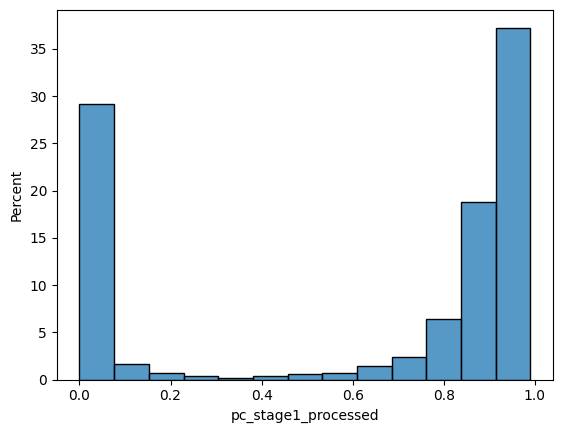

In [71]:
df_summary['pc_stage1_processed'] = df_summary['n_stage1_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage1_processed', stat='percent')

<Axes: xlabel='pc_stage2_processed', ylabel='Percent'>

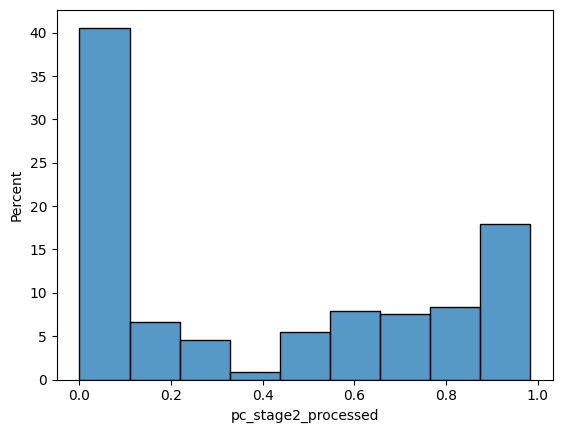

In [72]:
df_summary['pc_stage2_processed'] = df_summary['n_stage2_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage2_processed', stat='percent')

<Axes: xlabel='pc_postprocess_processed', ylabel='Percent'>

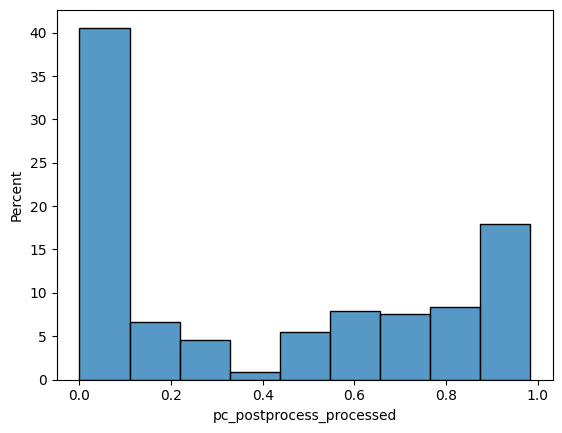

In [73]:
df_summary['pc_postprocess_processed'] = df_summary['n_postprocess_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_postprocess_processed', stat='percent')

<Axes: xlabel='yield', ylabel='Percent'>

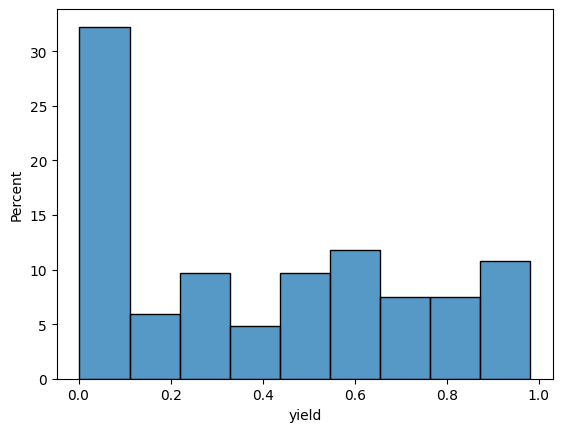

In [70]:
df_summary['yield'] = df_summary['n_master']/df_summary['n_images']
sns.histplot(data=df_summary, x='yield', stat='percent')